In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
image_dir = Path('/content/drive/MyDrive/Dog and Cat .png')

In [ ]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

,Filepath,Label
0,/content/drive/MyDrive/Dog and Cat .png/Dog/d2...,Dog
1,/content/drive/MyDrive/Dog and Cat .png/Dog/d1...,Dog
2,/content/drive/MyDrive/Dog and Cat .png/Dog/d2...,Dog
3,/content/drive/MyDrive/Dog and Cat .png/Dog/d2...,Dog
4,/content/drive/MyDrive/Dog and Cat .png/Dog/d1...,Dog
...,...,...
994,/content/drive/MyDrive/Dog and Cat .png/Cat/t9...,Cat
995,/content/drive/MyDrive/Dog and Cat .png/Cat/t9...,Cat
996,/content/drive/MyDrive/Dog and Cat .png/Cat/t7...,Cat
997,/content/drive/MyDrive/Dog and Cat .png/Cat/t6...,Cat


In [ ]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 699 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Change softmax to sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Load and preprocess your images using ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split data into training and validation
)

data_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dog and Cat .png',  # Provide the path to your data directory containing 'cats' and 'dogs' subdirectories
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify training subset
)

val_data_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dog and Cat .png',  # Provide the same path to your data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify validation subset
)

# Train the model
history = model.fit(
    data_generator,
    validation_data=val_data_generator,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/100
25/25 [==============================] - 39s 2s/step - loss: 0.7458 - accuracy: 0.4812 - val_loss: 0.6887 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 36s 1s/step - loss: 0.6804 - accuracy: 0.5487 - val_loss: 0.6754 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 40s 2s/step - loss: 0.6715 - accuracy: 0.5775 - val_loss: 0.6868 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 38s 2s/step - loss: 0.6695 - accuracy: 0.6075 - val_loss: 0.6562 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 41s 2s/step - loss: 0.6518 - accuracy: 0.6062 - val_loss: 0.6591 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 38s 2s/step - loss: 0.6466 - accuracy: 0.6263 - val_loss: 0.6379 - val_accuracy: 0.6700 - lr: 0

In [ ]:
results = model.evaluate(val_data_generator, verbose=2)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

7/7 - 4s - loss: 0.6457 - accuracy: 0.6300 - 4s/epoch - 634ms/step
    Test Loss: 0.64570
Test Accuracy: 63.00%


7/7 [==============================] - 5s 622ms/step


<ipython-input-29-468c25fa5e10>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = (model.predict(val_data_generator) >= 0.5).astype(np.int)


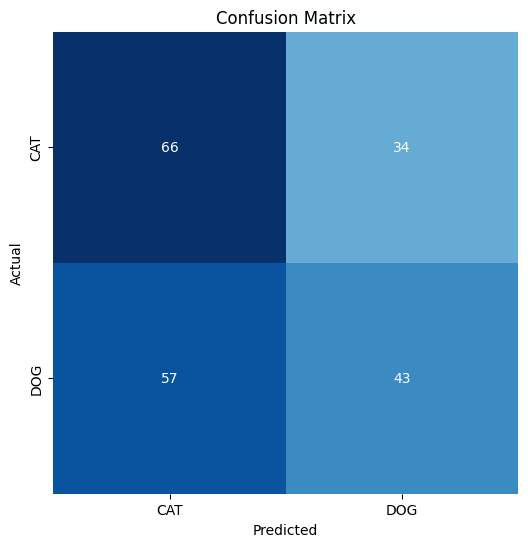

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.54      0.66      0.59       100
         DOG       0.56      0.43      0.49       100

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200



In [ ]:
predictions = (model.predict(val_data_generator) >= 0.5).astype(np.int)

cm = confusion_matrix(val_data_generator.labels, predictions, labels=[0, 1])
clr = classification_report(val_data_generator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)